# README

This delivery contains the implementation of two tasks.
In order to run succesfully, one must download the harcascades from 

*   https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

*   https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

Import them in their own drive and change the path in the "Synchronizing drive files section"

## Important notes:


1.   The face detection runs in a loop, one has to **stop manually the cell** and **re-run the notebook from the next cell** to run the rest of the task 1 successfully and the second task.
2.   In the "Testing the implementation" section of task 1, there are **two images** imported from the owner's drive which **will not be available**. To watch them one must see them in the mentioned section **before the first run.**






# TASK 1 - MACHINE LEARNING AND COMPUTER VISION PROJECT

Author: Nicolás Arrieta Larraza

Date: 01/02/2021

## Initializing



### Importing libraries

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import numpy as np
from PIL import Image

import io
import cv2 # OpenCV library

### Synchronizing Drive files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving cascades filters paths

In [ ]:
# Change for custom location
face_cascade_path = "/content/drive/MyDrive/UCA/ComputerVision/first_task/haarcascade_frontalface_default.xml"
eyes_cascade_path = "/content/drive/MyDrive/UCA/ComputerVision/first_task/haarcascade_eye.xml"

## Defining functions

Function to capture video from computer webcam trough the web browser (given)

In [ ]:
from google.colab.output import eval_js

def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.8);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

Functions to convert base64 to bytes array format and viceversa (given). These functions are necessary since the images in Javascript work with base64 format and OpenCV works with bytes array.

In [ ]:
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

## Computing face and eyes recognition

Importing the cascade filters to OpenCV

In [ ]:
face_cascades = cv2.CascadeClassifier(face_cascade_path)
eyes_cascades = cv2.CascadeClassifier(eyes_cascade_path)

In [ ]:
VideoCapture()
eval_js('create()')
while True:
  b64_im = eval_js('capture()') # Take a capture 
  im = b64_to_bytes(b64_im) # Convert the capture brom base64 to bytes array
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # Converting image to gray scale

  faces = face_cascades.detectMultiScale(gray, 1.1, 3) # Face detection with default parameters

  for (x,y, w,h) in faces: # x,y represent the top-left corner point. Besides, h and w are the height and width values respectively
    cv2.rectangle(im, (x,y), (x+w, y+h), (255,0,0),2) # Draw rectangle on detected faces 

    face_area_gray = gray[y:y+h, x:x+w] # Area of the face detected in gray scale
    face_area = im[y:y+h, x:x+w] # Area of the face detected

    eyes = eyes_cascades.detectMultiScale(face_area_gray, 1.1, 3) # Eyes detection in face area with default parameters
    for (e_x, e_y, e_w, e_h) in eyes: # e_x,e_y represent the top-left corner point. Besides, e_h and e_w are the height and width values respectively
      cv2.rectangle(face_area, (e_x,e_y), (e_x+e_w, e_y+e_h), (0,255,0),2) # Draw rectangle on detected eyes


  eval_js('showimg("{}")'.format(bytes_to_b64(im))) # Creating video display to show face and eyes detections

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In the light of the results it can be seen that , in general, the cascade classifier detects the head and eyes accurately.

However, it's worth to mention that it works better if the subject barely moves. As soon as one moves the head to the sides, the face and eyes recognition start failing (misdetecting or not detecting anything at all)

## Testing the implementation

### Object confusion

During few experiments it is noticeable that the eyes detection fails easily when small objects are close to the face. For instance, below we can see an image captured while wearing glasses.

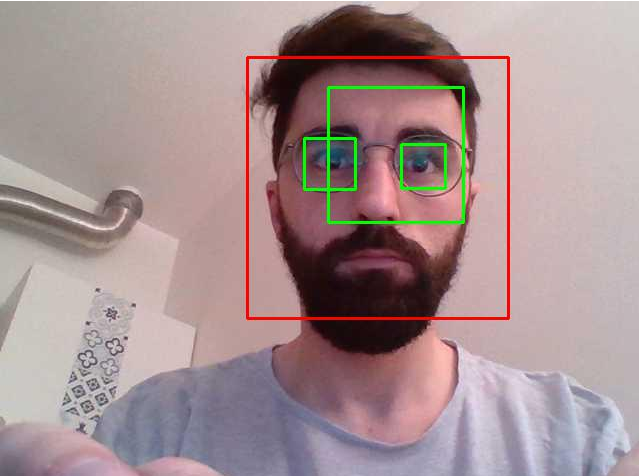

In [ ]:
try:
  img_glasses = "/content/drive/MyDrive/UCA/ComputerVision/first_task/glasses.png"
  img = Image.open(img_glasses)
  display(img)
except:
  print("Image only available for owner, try to watch it before running the notebook for first time")

### Performance with multiple people

In this test we wanted to determine if the implementation could work well with multiple people. As we can observe below, it works accurately.

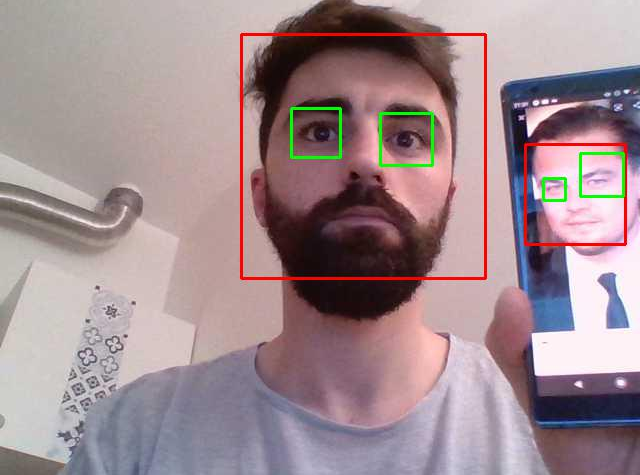

In [ ]:
try:
  img_multi_face = "/content/drive/MyDrive/UCA/ComputerVision/first_task/mutli_face.png"
  img=Image.open(img_multi_face)
  display(img)
except:
  print("Image only available for owner, try to watch it before running the notebook for first time")

## Conclusion

In the light of the results and the experiments made, the cascade classifier is an **easy to implement** system for feature detection but **highly limited**. 

On the one hand, the detection was quite accurate for video images in which the **subjects are still** and it also works for **multiple people**.

On the other hand, as soon as the subjects are **in movement the accuracy is aggravated** and it also commits **errors with objects** close to faces.

It is worth to highlight that the accuracy would be better if we **reduce the frames per second processed**. For instance, reducing to 0.1 the value in 
`result = canvas.toDataURL('image/jpeg', 0.1)`. Besides, we are testing the implementation with the basics cascade filters, using more advance cascade filters would guarantee a better detection too.

# TASK 2 - MACHINE LEARNING AND COMPUTER VISION PROJECT

Author: Nicolás Arrieta Larraza

Date: 08/02/2021

In this second task we implement an improved face detection algorithm. In order to reduce the computation time we will only search in a **Region of Interest** (ROI) rather than on the whole image as before.

We use the library imports and initialization of the previous task along with the video capture and base64 to Byte Array (and viceversa) functions

## Defining function to computing face recognition

In [ ]:
def detect_faces(img, cascades):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting image to gray scale
  faces = face_cascades.detectMultiScale(gray, 1.1, 3) # Face detection with default parameters
  return faces

## Defining function to compute Region of Interest

Let's define a function to compute the ROI:

In [ ]:
# This function computes the sub region in which we would want to detect faces (ROI)
# Params:
# previous: The previous face bounding box (x, y, w, h)
# image heigh and img_width: Self explaining and used to insure boundary constraints
# margin: How mach farther from the previous bounding box you would like to search for faces in the current frame 
def compute_optimized_search_region(previous, img_height, img_width, margin):
  #Adding margin to previous image in top left and bottom right corners
  x_top_l = previous[0] - margin
  y_top_l = previous[1] - margin
  x_bottom_r = previous[0] + previous[2] + margin #x+w
  y_bottom_r = previous[1] + previous[3] + margin #y+h

  #Ensuring the box stays in bounds of the image
  x_top_l = max(x_top_l,0)
  y_top_l = max(y_top_l,0)
  x_bottom_r = min(x_bottom_r,img_width)
  y_bottom_r = min(y_bottom_r,img_height)
  return (x_top_l, y_top_l, x_bottom_r - x_top_l , y_bottom_r - y_top_l)

## Computing face new implementation

In [ ]:
VideoCapture()
eval_js('create()')


byte = eval_js('capture()')
im = b64_to_bytes(byte)
(img_height, img_width) = im.shape[0], im.shape[1]

previous_bbox = None
margin = 50 #Default value


while True:
  byte = eval_js('capture()')
  im = b64_to_bytes(byte)
  region_to_use = im

  if previous_bbox is not None: # If we have detected a face in the previous frame
    # Use the previous bounding box to compute the sub region in which we would like to seach for faces
    new_x, new_y, new_w, new_h = compute_optimized_search_region(previous_bbox, img_height, img_width, margin)
    region_to_use = im[new_y:new_y+new_h, new_x:new_x+new_w]
    cv2.rectangle(im, (new_x,new_y), (new_x+new_w, new_y+new_h), (255,0,0),2)
    # Draw a red rectangle around the sub region in the 'im' image (because it's the one we will plot finally)

  # detect faces in the subregion to use
  faces = detect_faces(region_to_use, face_cascades)
  
  # Checking there is only one face detected (on face frame)
  if len(faces) == 1:
    face = faces[0]
    # If there is not a face frame detected before assign the new face found
    if previous_bbox is None:
      (x,y,w,h) = face 
    else:
       (x,y,w,h)=(new_x+face[0], new_y+face[1], face[2], face[3])
    # If there is a face frame detected before update the frame values with the new ones
    previous_bbox = (x,y,w,h)
    # Draw a green rectangle around the detected face in the original image 'im'
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,255,0),2)
  else: 
    previous_bbox = None # If we did not detect any face or more than one face we just repeat the search using the entire image in the next frame

  eval_js('showimg("{}")'.format(bytes_to_b64(im))) # We convert our image with bounding boxes to base64 and plot it using JS 

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored